<a href="https://colab.research.google.com/github/Artty02/NBA/blob/main/DADS5001_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

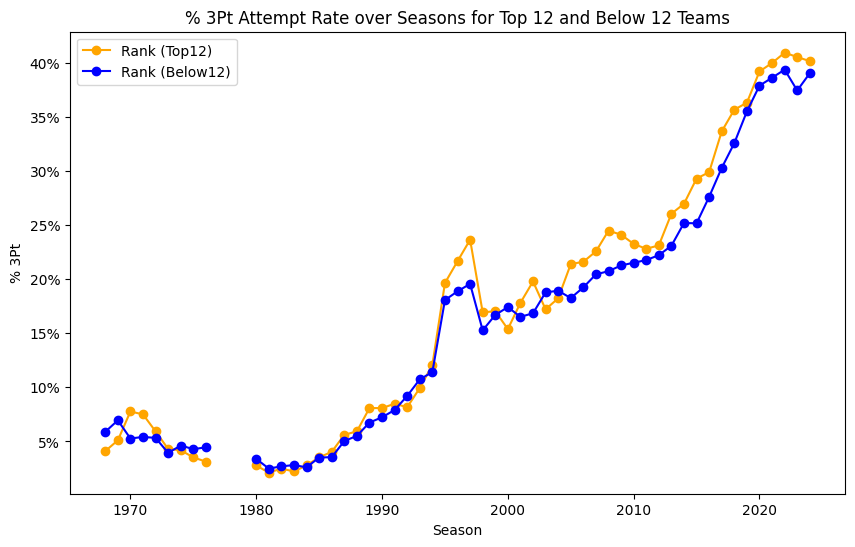

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV
team_summaries_df = pd.read_csv('Team Summaries.csv')

# สร้างคอลัมน์ 'rank' โดยการจัดอันดับทีมตามจำนวนชนะ 'w' (จากมากไปน้อย)
team_summaries_df['rank'] = team_summaries_df.groupby('season')['w'].rank(ascending=False)

# เพิ่มคอลัมน์ใหม่ 'Rank<12' โดยการแบ่งทีมเป็น Top 12 และ Below 12
team_summaries_df['Rank<12'] = team_summaries_df['rank'].apply(lambda x: 'Top12' if x <= 12 else 'Below12')

# จัดกลุ่มข้อมูลตาม 'season' และ 'Rank<12' และคำนวณค่าเฉลี่ยของ 'x3p_ar' สำหรับกลุ่ม Top12 และ Below12
df_grouped_rank12 = team_summaries_df.groupby(['season', 'Rank<12'])['x3p_ar'].mean().unstack()

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# Plotting สำหรับทีม Top 12
if 'Top12' in df_grouped_rank12.columns:
    plt.plot(df_grouped_rank12.index, df_grouped_rank12['Top12'], label='Rank (Top12)', color='orange', marker='o')

# Plotting สำหรับทีม Below 12
if 'Below12' in df_grouped_rank12.columns:
    plt.plot(df_grouped_rank12.index, df_grouped_rank12['Below12'], label='Rank (Below12)', color='blue', marker='o')

# ตั้งชื่อแกน X, Y และชื่อกราฟ
plt.xlabel('Season')
plt.ylabel('% 3Pt')
plt.title('% 3Pt Attempt Rate over Seasons for Top 12 and Below 12 Teams')

# ปรับแกน Y ให้แสดงเป็นเปอร์เซ็นต์
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# เพิ่มคำอธิบายกราฟ
plt.legend()

# แสดงกราฟ
plt.show()



ข้อมูล % (จำนวนการชู๊ต 3 คะแนน) /(จำนวนการชู๊ตทั้งหมด) โดยจัดแบ่งเป็นทีมที่ มีอันดับมากกว่า 12 จะเป็นเส้นสีเหลืองและ ทีมที่ไ้อนดับต่ำกว่า 12 เป็นสีน้ำเงิน จากกราฟ ทีมที่ได้อันดับมากว่า 12 จะมีการชู๊ต 3 คะแนนโดยเฉลี่ยที่มากกว่า นั้นคือการยิ่ง 3 แต้มที่มากขึ้นจะเพิ่มโอกาสให้อันดับดีขึ้น

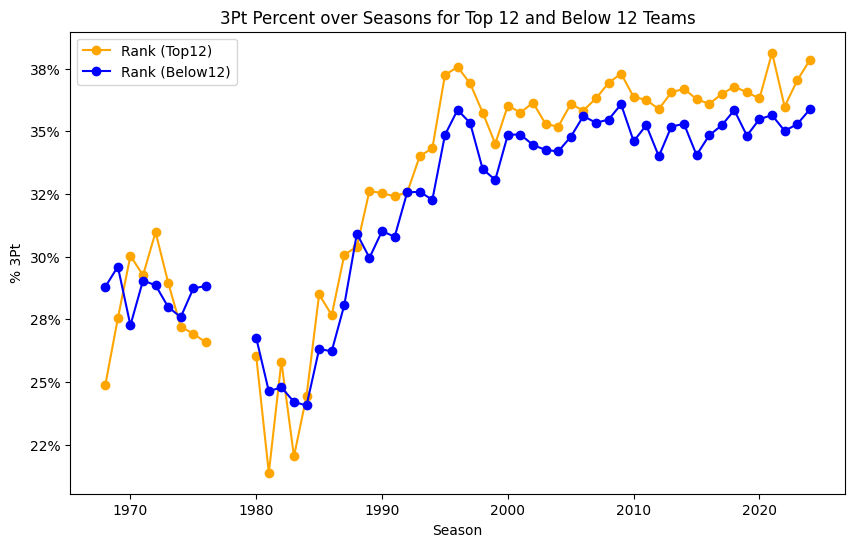

In [ ]:
import matplotlib.pyplot as plt

# Load both CSV files
team_summaries_df = pd.read_csv('Team Summaries.csv')
team_totals_df = pd.read_csv('Team Totals.csv')

# Display the first few rows of both DataFrames to understand the structure
team_summaries_df.head(), team_totals_df.head()


# The correct column name is 'x3p_percent', not 'fg3_percent'.
# Let's try merging again using the correct column name

merged_df = pd.merge(
    team_summaries_df,
    team_totals_df[['season', 'abbreviation', 'x3p_percent']],
    on=['season', 'abbreviation'],
    how='left'
)

# Check the first few rows to ensure the merge was successful
merged_df.head()



# Create the 'rank' column based on the number of wins ('w') by season
merged_df['rank'] = merged_df.groupby('season')['w'].rank(ascending=False)

# Create 'Rank<12' column to classify teams into Top 12 and Below 12
merged_df['Rank<12'] = merged_df['rank'].apply(lambda x: 'Top12' if x <= 12 else 'Below12')

# Group by 'season' and 'Rank<12', then calculate the mean 'x3p_percent' for each group
df_grouped_rank12 = merged_df.groupby(['season', 'Rank<12'])['x3p_percent'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))

# Plot for Top 12 teams
if 'Top12' in df_grouped_rank12.columns:
    plt.plot(df_grouped_rank12.index, df_grouped_rank12['Top12'], label='Rank (Top12)', color='orange', marker='o')

# Plot for Below 12 teams
if 'Below12' in df_grouped_rank12.columns:
    plt.plot(df_grouped_rank12.index, df_grouped_rank12['Below12'], label='Rank (Below12)', color='blue', marker='o')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('% 3Pt')
plt.title('3Pt Percent over Seasons for Top 12 and Below 12 Teams')

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add legend
plt.legend()

# Display the plot
plt.show()


แต่ปริมาณอย่างเดียวไม่ได้ทำให้อันดับ ดีขึ้น จากในการฟจะเห็นว่า ทีมจะต้องมี % การ ชู๊ต 3 แต้มเฉลี่ยมากกว่า 35% ด้วย

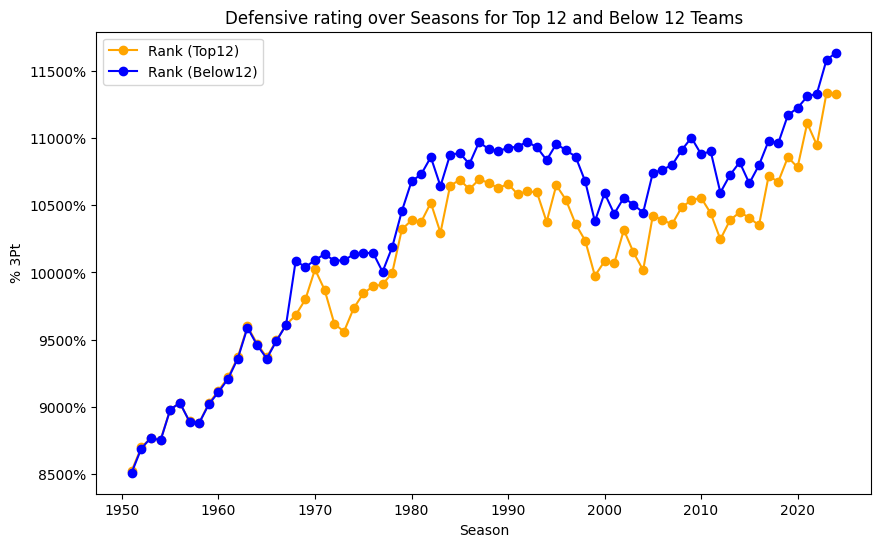

In [ ]:
# โหลดไฟล์ CSV
team_summaries_df = pd.read_csv('Team Summaries.csv')

# สร้างคอลัมน์ 'rank' โดยการจัดอันดับทีมตามจำนวนชนะ 'w' (จากมากไปน้อย)
team_summaries_df['rank'] = team_summaries_df.groupby('season')['w'].rank(ascending=False)

# เพิ่มคอลัมน์ใหม่ 'Rank<12' โดยการแบ่งทีมเป็น Top 12 และ Below 12
team_summaries_df['Rank<12'] = team_summaries_df['rank'].apply(lambda x: 'Top12' if x <= 12 else 'Below12')

# จัดกลุ่มข้อมูลตาม 'season' และ 'Rank<12' และคำนวณค่าเฉลี่ยของ 'd_rtg' สำหรับกลุ่ม Top12 และ Below12
df_grouped_rank12 = team_summaries_df.groupby(['season', 'Rank<12'])['d_rtg'].mean().unstack()

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# Plotting สำหรับทีม Top 12
if 'Top12' in df_grouped_rank12.columns:
    plt.plot(df_grouped_rank12.index, df_grouped_rank12['Top12'], label='Rank (Top12)', color='orange', marker='o')

# Plotting สำหรับทีม Below 12
if 'Below12' in df_grouped_rank12.columns:
    plt.plot(df_grouped_rank12.index, df_grouped_rank12['Below12'], label='Rank (Below12)', color='blue', marker='o')

# ตั้งชื่อแกน X, Y และชื่อกราฟ
plt.xlabel('Season')
plt.ylabel('% 3Pt')
plt.title('Defensive rating over Seasons for Top 12 and Below 12 Teams')

# ปรับแกน Y ให้แสดงเป็นเปอร์เซ็นต์
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# เพิ่มคำอธิบายกราฟ
plt.legend()

# แสดงกราฟ
plt.show()


ข้อมูล defensive rating โดยจัดแบ่งเป็นทีมที่ มีอันดับมากกว่า 12 จะเป็นเส้นสีเหลืองและ ทีมที่ไ้อนดับต่ำกว่า 12 เป็นสีน้ำเงิน จากกราฟ ทีมที่ได้อันดับมากว่า 12 จะมี defensive rating ที่น้อยกว่า defensive rating ที่สูงไม่ได้ช่วยให้ทีมจบอันดับที่ดี

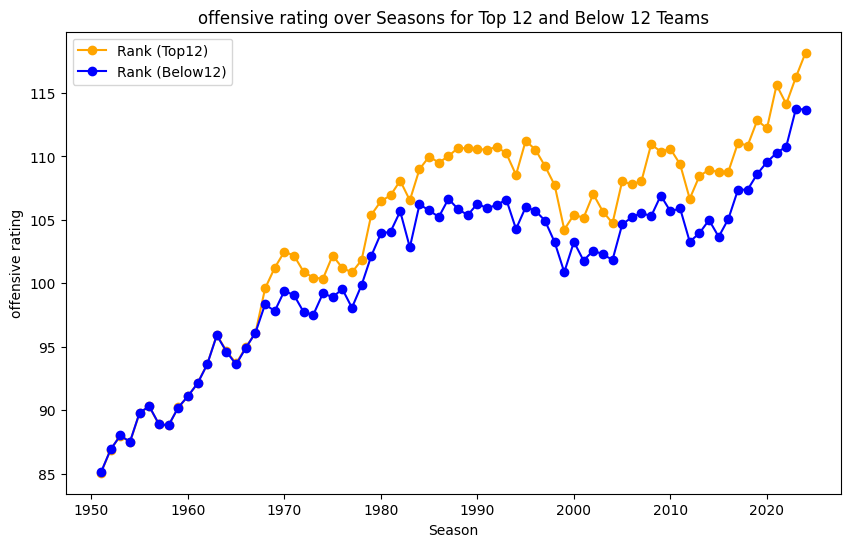

Correlation between Rank and offensiveRating (o_rtg):
          rank    o_rtg
rank   1.00000 -0.08177
o_rtg -0.08177  1.00000


In [ ]:
# เพิ่มคอลัมน์ใหม่ 'Rank<12' โดยใช้เงื่อนไขเพื่อดูว่าทีมอยู่ในอันดับน้อยกว่า 12 หรือไม่
team_summaries_df['Rank<12'] = team_summaries_df['rank'].apply(lambda x: 'Top12' if x <= 12 else 'Below12')

# จัดกลุ่มข้อมูลตาม 'season' และคำนวณค่าเฉลี่ยของ 'o_rtg' สำหรับ 'Top12' และ 'Below12' groups
df_grouped_rank12 = team_summaries_df.groupby(['season', 'Rank<12'])['o_rtg'].mean().unstack()

# สร้างกราฟโดยไม่แสดงตัวเลขบนจุดข้อมูลและปรับแกน Y ให้แสดงเป็นเปอร์เซ็นต์
plt.figure(figsize=(10, 6))

# Plotting the line for teams with 'Top11'
if 'Top12' in df_grouped_rank12.columns:
    plt.plot(df_grouped_rank12.index, df_grouped_rank12['Top12'], label='Rank (Top12)', color='orange', marker='o')

# Plotting the line for teams with 'Below12'
if 'Below12' in df_grouped_rank12.columns:
    plt.plot(df_grouped_rank12.index, df_grouped_rank12['Below12'], label='Rank (Below12)', color='blue', marker='o')

# ตั้งชื่อแกนและชื่อกราฟ
plt.xlabel('Season')
plt.ylabel('offensive rating')
plt.title('offensive rating over Seasons for Top 12 and Below 12 Teams')


# เพิ่มคำอธิบายกราฟ
plt.legend()

# แสดงกราฟ
plt.show()

# คำนวณ correlation ระหว่าง 'rank' และ 'd_rtg'
rank_drtg_correlation = team_summaries_df[['rank', 'o_rtg']].corr()

# แสดงผลค่า correlation
print("Correlation between Rank and offensiveRating (o_rtg):")
print(rank_drtg_correlation)

ข้อมูล offensive rating โดยจัดแบ่งเป็นทีมที่ มีอันดับมากกว่า 12 จะเป็นเส้นสีเหลืองและ ทีมที่ไ้อนดับต่ำกว่า 12 เป็นสีน้ำเงิน จากกราฟ ทีมที่ได้อันดับมากว่า 12 จะมี offensive rating ที่มากกว่า offensive rating นั้นเป็นสิ่งที่ทีมควรจะทำให้สูงขึ้น

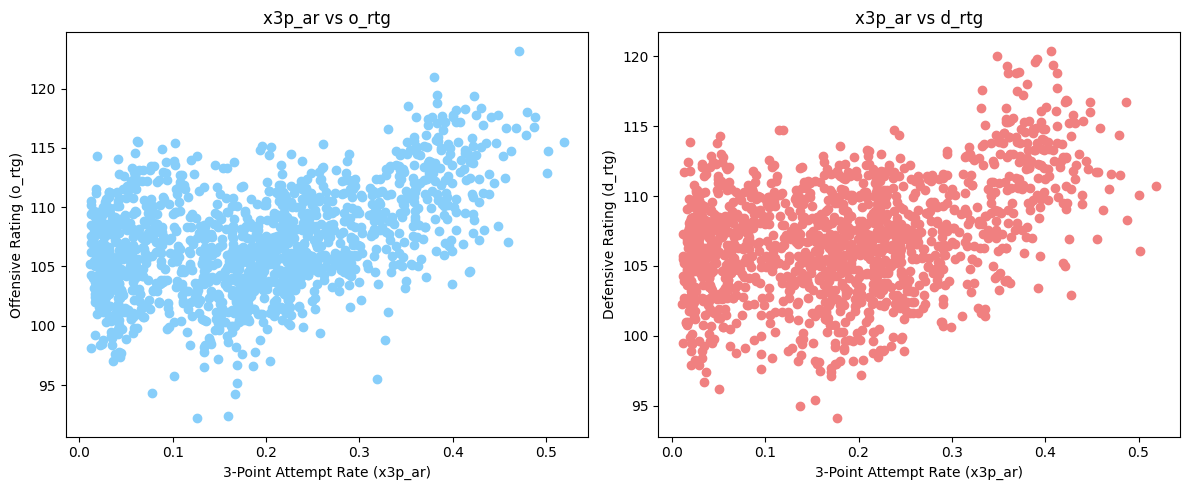

In [ ]:
import matplotlib.pyplot as plt

# ตรวจสอบว่าคุณมีข้อมูล x3p_ar, o_rtg, และ d_rtg หรือไม่
# ในตัวอย่างนี้ ผมจะสมมติว่า merged_df มีข้อมูลเหล่านี้อยู่แล้ว

# Create scatter plots to visualize the relationship between x3p_ar and o_rtg, d_rtg
plt.figure(figsize=(12, 5))

# Plot for x3p_ar vs o_rtg
plt.subplot(1, 2, 1)
plt.scatter(merged_df['x3p_ar'], merged_df['o_rtg'], color='lightskyblue')
plt.title('x3p_ar vs o_rtg')
plt.xlabel('3-Point Attempt Rate (x3p_ar)')
plt.ylabel('Offensive Rating (o_rtg)')

# Plot for x3p_ar vs d_rtg
plt.subplot(1, 2, 2)
plt.scatter(merged_df['x3p_ar'], merged_df['d_rtg'], color='lightcoral')
plt.title('x3p_ar vs d_rtg')
plt.xlabel('3-Point Attempt Rate (x3p_ar)')
plt.ylabel('Defensive Rating (d_rtg)')

# Show the plots
plt.tight_layout()
plt.show()


กราฟแสดง correlation ระหว่างการชู๊ต 3 คะแนนกับ Defensive Rating และ offensive rating จะเห็นว่าการชู๊ต 3 คะแนน ที่มากขึ้นนั้นส่งผลด้านบวกกับทั้ง 2 ค่านั้น แต่อย่างลืมว่าจากสถิติ ทีมควรเน้นไปที่ offensive rating มากกว่า

In [ ]:
import pandas as pd

# Load the dataset to inspect it and begin exploratory data analysis (EDA)
file_path = 'Player Shooting.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information of the dataset
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16785 entries, 0 to 16784
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        16785 non-null  int64  
 1   season                         16785 non-null  int64  
 2   player_id                      16785 non-null  int64  
 3   player                         16785 non-null  object 
 4   birth_year                     198 non-null    float64
 5   pos                            16785 non-null  object 
 6   age                            16785 non-null  int64  
 7   experience                     16785 non-null  int64  
 8   lg                             16785 non-null  object 
 9   tm                             16785 non-null  object 
 10  g                              16785 non-null  int64  
 11  mp                             16785 non-null  int64  
 12  fg_percent                     16682 non-null 

(None,
    seas_id  season  player_id         player  birth_year pos  age  experience  \
 0    31136    2024       5025     A.J. Green         NaN  SG   24           2   
 1    31137    2024       5026    A.J. Lawson         NaN  SG   23           2   
 2    31138    2024       5027     AJ Griffin         NaN  SF   20           2   
 3    31139    2024       4219   Aaron Gordon         NaN  PF   28          10   
 4    31140    2024       4582  Aaron Holiday         NaN  PG   27           6   
 
     lg   tm  ...  fg_percent_from_x16_3p_range  fg_percent_from_x3p_range  \
 0  NBA  MIL  ...                         0.500                      0.408   
 1  NBA  DAL  ...                         0.500                      0.260   
 2  NBA  ATL  ...                         0.250                      0.256   
 3  NBA  DEN  ...                         0.417                      0.290   
 4  NBA  HOU  ...                         0.350                      0.387   
 
    percent_assisted_x2p_fg  

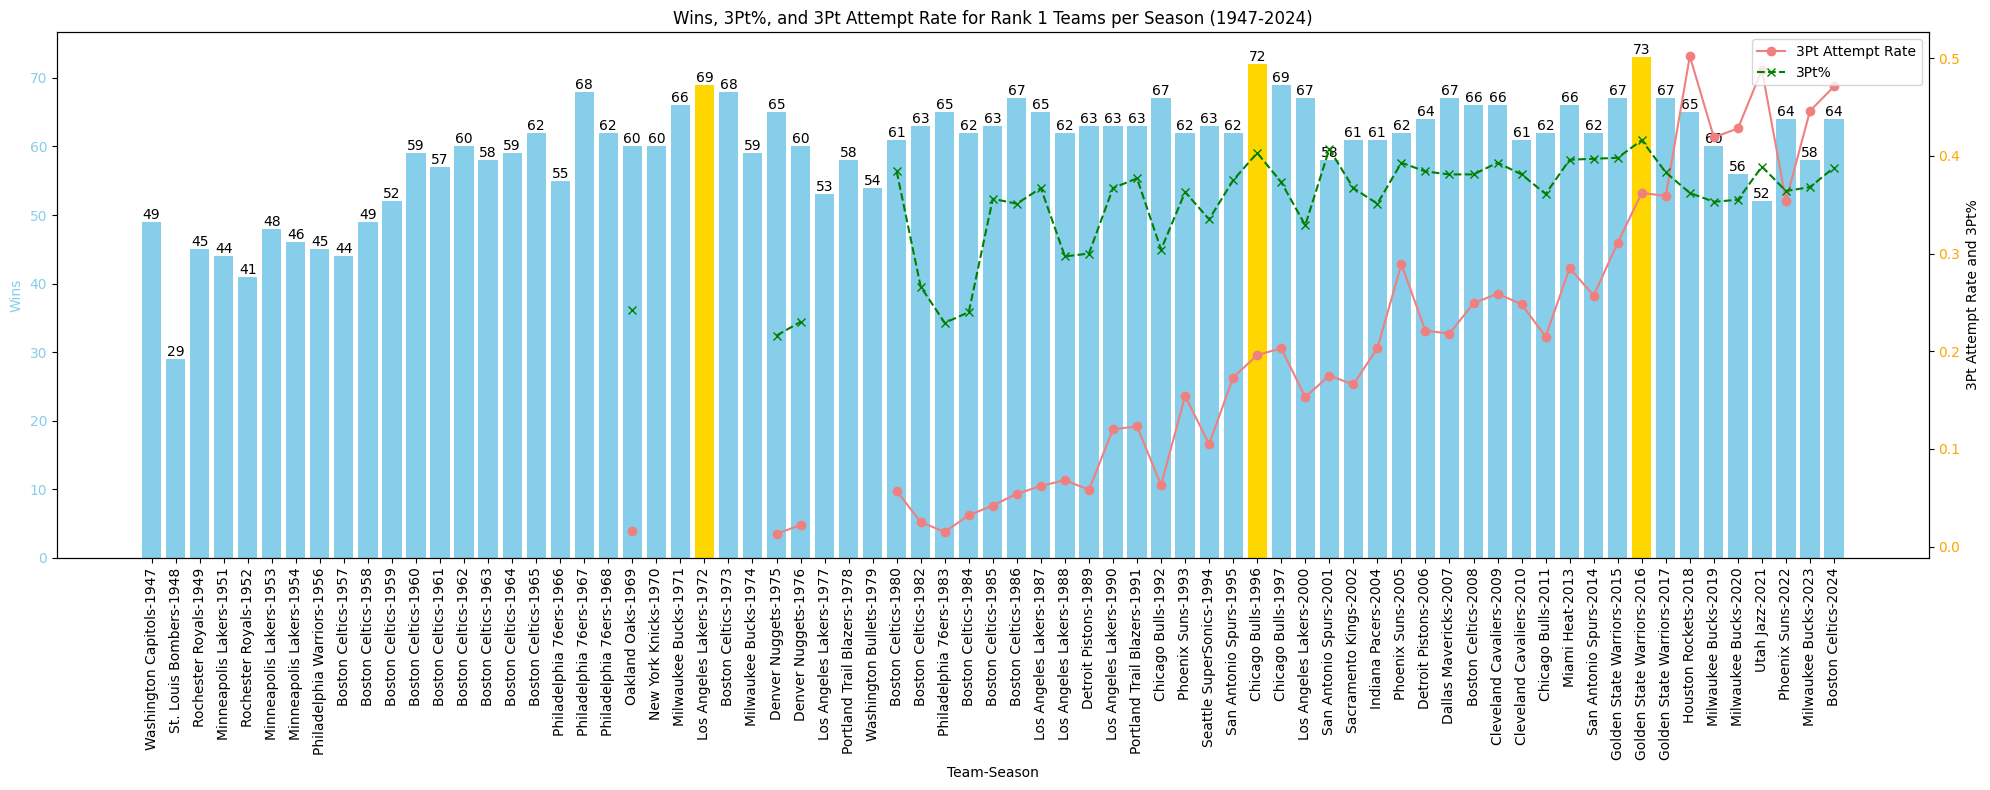

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# สร้างคอลัมน์ 'Team-Season' และจัดเรียงข้อมูลตามฤดูกาล (season)
rank_1_teams['Team-Season'] = rank_1_teams['team'] + "-" + rank_1_teams['season'].astype(str)
rank_1_teams = rank_1_teams.sort_values('season')

# Merge team_summaries_sorted with team_totals โดยใช้ suffix เพื่อป้องกันปัญหาคอลัมน์ซ้ำ
rank_1_teams = rank_1_teams.merge(team_totals[['team', 'season', 'x3p_percent']],
                                  on=['team', 'season'],
                                  how='left',
                                  suffixes=('', '_new'))

# ตรวจสอบว่ามีคอลัมน์ x3p_percent ซ้ำกันหรือไม่ ถ้ามีก็ใช้ข้อมูลใหม่แทน
rank_1_teams['x3p_percent'] = rank_1_teams['x3p_percent_new'].fillna(rank_1_teams['x3p_percent'])
rank_1_teams = rank_1_teams.drop(columns=['x3p_percent_new'])

# ระบุทีมที่อยู่ใน 3 อันดับแรกจากการเรียงลำดับจำนวนชัยชนะ (w)
top_3_teams = rank_1_teams.nlargest(3, 'w')

# กำหนดสีให้กับทีมใน 3 อันดับแรกและทีมที่เหลือ
bar_colors = ['gold' if team in top_3_teams['Team-Season'].values else 'skyblue' for team in rank_1_teams['Team-Season']]

# สร้างกราฟ
fig, ax1 = plt.subplots(figsize=(20, 8))

# กราฟแท่งแสดงจำนวนชัยชนะ (w) พร้อมสีพิเศษสำหรับทีมที่อยู่ใน 3 อันดับแรก
ax1.bar(rank_1_teams['Team-Season'], rank_1_teams['w'], color=bar_colors)
ax1.set_xlabel('Team-Season')
ax1.set_ylabel('Wins', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(rotation=90)

# เพิ่มข้อความบนแท่งกราฟ
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', color='black')

# กราฟเส้นแสดง 'x3p_ar' และ 'x3p_percent'
ax2 = ax1.twinx()
ax2.plot(rank_1_teams['Team-Season'], rank_1_teams['x3p_ar'], color='lightcoral', marker='o', label='3Pt Attempt Rate')
ax2.plot(rank_1_teams['Team-Season'], rank_1_teams['x3p_percent'], color='green', marker='x', linestyle='--', label='3Pt%')
ax2.set_ylabel('3Pt Attempt Rate and 3Pt%')
ax2.tick_params(axis='y', labelcolor='orange')

# กำหนดหัวเรื่อง และแสดงคำอธิบาย (legend)
plt.title('Wins, 3Pt%, and 3Pt Attempt Rate for Rank 1 Teams per Season (1947-2024)')
ax2.legend(loc='upper right')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()



1.กราฟแท่งสีฟ้าแสดง จำนวนเกมที่ชนะ ของทีมที่จบ อันดับ 1 ใน Regular season
2.กราฟเส้นสีชมพลูแสดง จำนวนการยิง 3 คะแนน ของทีมที่จบ อันดับ 1 ใน Regular season
3.กราฟสีเขียวแสดง % ความแม่ยำในการชู๊ต 3 คะแนน ของทีมที่จบ อันดับ 1 ใน Regular season

ถ้าสังเกตุที่เส้นสีชมพลูจะเห็นได้ว่า ปริมาณการชู๊ต 3 คะแนน ในช่วง 2010 ดูจะมีการเพิ่มขึ้นมากว่าช่วงก่อนหน้านั้น ที่นี่น่าสนใจ Golden State Warriors โดยเแพาะในปี 2016 เป็นทีมที่ทำลายสถิติชนะมากที่สุดใน season ที่ 73 เกม

In [ ]:
import pandas as pd

# โหลดไฟล์ CSV
shooting_data = pd.read_csv('Player Shooting.csv')
totals_data = pd.read_csv('Player Totals.csv')

# สร้างคอลัมน์ใหม่ 'Player-Season' โดยรวมชื่อผู้เล่นกับฤดูกาลในทั้งสอง DataFrames
totals_data['Player-Season'] = totals_data['player'] + '-' + totals_data['season'].astype(str)
shooting_data['Player-Season'] = shooting_data['player'] + '-' + shooting_data['season'].astype(str)

# คัดกรองผู้เล่น 10 อันดับแรกตามจำนวนการยิง 3 คะแนน (x3p) จาก totals_data
top_10_by_x3p = totals_data.nlargest(10, 'x3p')

# Merge ข้อมูลการยิงเข้ากับข้อมูลรวม โดยใช้ 'Player-Season' เป็นตัวเชื่อม
top_10_by_x3p_with_season = top_10_by_x3p.merge(shooting_data, on='Player-Season', how='left')

# เลือกเฉพาะคอลัมน์ที่ต้องการแสดง: 'Player-Season', 'x3p', 'x3pa', 'x3p_percent'
top_10_filtered = top_10_by_x3p_with_season[['Player-Season', 'x3p', 'x3pa', 'x3p_percent']]

# Reset the index of the final DataFrame to have a clean index starting from 0
top_10_filtered_reset = top_10_filtered.reset_index(drop=True)

# แสดงผลลัพธ์
top_10_filtered_reset



,Player-Season,x3p,x3pa,x3p_percent
0,Stephen Curry-2016,402.0,886.0,0.454
1,James Harden-2019,378.0,1028.0,0.368
2,Stephen Curry-2024,357.0,876.0,0.408
3,Stephen Curry-2019,354.0,810.0,0.437
4,Stephen Curry-2021,337.0,801.0,0.421
5,Stephen Curry-2017,324.0,789.0,0.411
6,Klay Thompson-2023,301.0,731.0,0.412
7,James Harden-2020,299.0,843.0,0.355
8,Paul George-2019,292.0,757.0,0.386
9,Buddy Hield-2023,288.0,677.0,0.425


นั้นเพราะ ทีม Golden State Warriors เน้นที่การชู๊ต 3 คะแนนเป็นหลัก ซึ่งตัวหลักในการนำทีมชุดนี้คือ (Splash Brothers) Stephen Curry และ Klay Thompson ถ้าเราดูสถิติคนที่ชู๊ต 3 คะแนนมากที่สุดใน 1 season 10 อันดับ แรก อันดับ 1 คือ Stephen Curry ที่ 402 ครั้ง และ Stephen Curry ยังเป็นเจ้าของสถิติในอันดับที่ 3,4,5,6 ด้วยนั้นคือใน 10 อันดับแรกเป็นสถิติของ Stephen Curry 5 อันดับ ส่วน Klay Thompson ได้อันดับที่ 7

In [ ]:
import pandas as pd

# โหลดไฟล์ CSV
shooting_data = pd.read_csv('Player Shooting.csv')
totals_data = pd.read_csv('Player Totals.csv')

# สร้างคอลัมน์ใหม่ 'Player-Season' โดยรวมชื่อผู้เล่นกับฤดูกาล
totals_data['Player-Season'] = totals_data['player'] + '-' + totals_data['season'].astype(str)

# รวมจำนวนครั้งที่ทำ 3-Point สำเร็จของผู้เล่นทั้งหมด
player_3p_totals = totals_data.groupby('player')['x3p'].sum()

# รวมจำนวนครั้งที่ยิง 3-Point ทั้งหมดของผู้เล่นแต่ละคน
player_3pa_totals = totals_data.groupby('player')['x3pa'].sum()

# คำนวณเปอร์เซ็นต์การยิง 3-Point (x3p_percent = x3p / x3pa * 100)
player_x3p_percent = (player_3p_totals / player_3pa_totals) * 100

# Add the 'x3pa' column to the DataFrame to the left of 'x3p'
top_10_by_total_x3p_with_experience = pd.DataFrame({
    'player': player_3p_totals.index,
    'x3pa': player_3pa_totals.values,  # Add the 3-point attempts column
    'x3p': player_3p_totals.values,
    'x3p_percent': player_x3p_percent.values
}).sort_values(by='x3p', ascending=False).head(10)

# Calculate the max experience for each player
max_experience = totals_data.groupby('player')['experience'].max()

# Add the 'max_experience' column to the right side of the DataFrame
top_10_by_total_x3p_with_experience['max_experience'] = top_10_by_total_x3p_with_experience['player'].map(max_experience)

# Swap the positions of 'x3pa' and 'x3p' columns
top_10_by_total_x3p_with_experience_reordered = top_10_by_total_x3p_with_experience[['player', 'x3p', 'x3pa', 'x3p_percent', 'max_experience']]

# Display the reordered DataFrame
top_10_by_total_x3p_with_experience_reordered


,player,x3p,x3pa,x3p_percent,max_experience
4553,Stephen Curry,3747.0,8805.0,42.555366,15
2297,James Harden,3209.0,8864.0,36.202617,15
4069,Ray Allen,3174.0,7962.0,39.864356,18
3098,Kyle Korver,2861.0,6718.0,42.587079,17
1062,Damian Lillard,2607.0,7032.0,37.073379,12
4118,Reggie Miller,2560.0,6486.0,39.469627,18
675,Buddy Hield,2553.0,6471.0,39.452944,8
4941,Vince Carter,2533.0,6802.0,37.239047,22
3071,Klay Thompson,2481.0,6010.0,41.281198,11
3182,LeBron James,2410.0,6926.0,34.796419,21


In [ ]:
import pandas as pd

# สมมติว่าคุณมีข้อมูลในตัวแปร data_cleaned

# ฟังก์ชันคำนวณคะแนนที่คาดหวังจากช่วงระยะต่างๆ
def calculate_expected_points(df, ranges, point_multipliers):
    """
    ฟังก์ชันคำนวณคะแนนที่คาดหวังจากช่วงระยะต่างๆ
    df: DataFrame ที่มีข้อมูลเปอร์เซ็นต์การยิง
    ranges: รายการของช่วงระยะต่างๆ
    point_multipliers: ตัวคูณคะแนนสำหรับแต่ละช่วงระยะ
    """
    for r in ranges:
        df[f'expected_points_{r}'] = df[f'fg_percent_from_{r}'] * point_multipliers[r]
    return df

# กำหนดตัวคูณคะแนนสำหรับแต่ละช่วงระยะ
point_multipliers = {
    'x0_3_range': 2,     # 2 คะแนนสำหรับยิงใกล้
    'x3_10_range': 2,    # 2 คะแนนสำหรับยิงระยะกลาง
    'x10_16_range': 2,   # 2 คะแนนสำหรับยิงระยะไกลกว่า
    'x16_3p_range': 2,   # 2 คะแนนสำหรับยิงระยะไกล
    'x3p_range': 3       # 3 คะแนนสำหรับยิง 3 แต้ม
}

# กรองข้อมูลเพื่อใช้เฉพาะฤดูกาล 1997 และ 2024
df_1997_2024 = data_cleaned[(data_cleaned['season'].isin([1997, 2024]))][[
    'season',
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]]

# รายการช่วงระยะสำหรับการคำนวณ
ranges = ['x0_3_range', 'x3_10_range', 'x10_16_range', 'x16_3p_range', 'x3p_range']

# คำนวณคะแนนที่คาดหวังสำหรับฤดูกาล 1997 และ 2024
season_avg = calculate_expected_points(df_1997_2024.groupby('season').mean().reset_index(), ranges, point_multipliers)

# จัดรูปแบบ DataFrame เพื่อแสดงผลในโครงสร้างที่เหมาะสม
expected_points_pandas = pd.DataFrame({
    'Expected Points': ['x0-3 range', 'x3-10 range', 'x10-16 range', 'x16-3p range', 'x3p range'],
    '1997': season_avg[season_avg['season'] == 1997][[f'expected_points_{r}' for r in ranges]].values.flatten().round(2),
    '2024': season_avg[season_avg['season'] == 2024][[f'expected_points_{r}' for r in ranges]].values.flatten().round(2)
})

# แสดงผล DataFrame
expected_points_pandas


,Expected Points,1997,2024
0,x0-3 range,1.05,1.35
1,x3-10 range,0.79,0.82
2,x10-16 range,0.69,0.79
3,x16-3p range,0.80,0.74
4,x3p range,0.88,0.95


ทั้งนี้ตัวรูปแบบการเล่นที่เปลี่ยนไป การมาของ Stephen Curry เป็นจุดเปลี่ยนของวงการให้ ทีมใน NBA หัดมาให้ความสำคัญกับ เรื่องสถิติและความน่าจะเป็นมากขึ้น นั้นคือถ้าเราลองคำนวน ค่าคาดหวังในการทำคะแนนโดยเฉลี่ยแล้ว ก็จะเห็นว่า ค่าคาดหวังของการทำคะแนนที่ระยะ 0-3 feet นั้นมีมากที่สุดเพราะเป็นระยะที่มีความแย่นยำสูงสุด แต่อัดนั้บที่ 2 กลับเป้นการทำคะแนนที่ระยะ 3 คะแนน เพราะโดยเฉลี่ยแล้ว การทำคะแนนที่ ตั้งแต่ละระ 10 feet ขึ้นไปนั้นแทบไม่ต่างกับ การชู๊ต 3 คะแนน เลยทำให้ทุกทีมใน NBA หันมาให้ความสำคัญในการทำคะแนน โดยเน้นไปที่ ระยะ 0-3 feet และ 3pt ไปเลยเพราะมีประสิทธิภาพมากกว่านั้นเอง

Stephen Curry ยังเป็นเจ้าของสถิติคนที่ชู๊ต 3 คะแนนลงมากที่สุดตลอดกาล

In [ ]:
# Handling missing values: For the purpose of the analysis, we will drop columns with excessive missing data and fill minor gaps.

# Dropping columns with over 40% missing data
threshold = 0.6 * len(data)
data_cleaned = data.dropna(thresh=threshold, axis=1)

# For the remaining missing values, fill numeric columns with median and categorical with mode
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Filling missing values: numeric with median, categorical with mode
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna(data_cleaned[categorical_columns].mode().iloc[0])

# Display the cleaned data info and first few rows after cleaning
data_cleaned.info(), data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16785 entries, 0 to 16784
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        16785 non-null  int64  
 1   season                         16785 non-null  int64  
 2   player_id                      16785 non-null  int64  
 3   player                         16785 non-null  object 
 4   pos                            16785 non-null  object 
 5   age                            16785 non-null  int64  
 6   experience                     16785 non-null  int64  
 7   lg                             16785 non-null  object 
 8   tm                             16785 non-null  object 
 9   g                              16785 non-null  int64  
 10  mp                             16785 non-null  int64  
 11  fg_percent                     16785 non-null  float64
 12  avg_dist_fga                   16785 non-null 

<ipython-input-153-e7ad67e1fa47>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())
<ipython-input-153-e7ad67e1fa47>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna(data_cleaned[categorical_columns].mode().iloc[0])


(None,
    seas_id  season  player_id         player pos  age  experience   lg   tm  \
 0    31136    2024       5025     A.J. Green  SG   24           2  NBA  MIL   
 1    31137    2024       5026    A.J. Lawson  SG   23           2  NBA  DAL   
 2    31138    2024       5027     AJ Griffin  SF   20           2  NBA  ATL   
 3    31139    2024       4219   Aaron Gordon  PF   28          10  NBA  DEN   
 4    31140    2024       4582  Aaron Holiday  PG   27           6  NBA  HOU   
 
     g  ...  fg_percent_from_x16_3p_range  fg_percent_from_x3p_range  \
 0  56  ...                         0.500                      0.408   
 1  42  ...                         0.500                      0.260   
 2  20  ...                         0.250                      0.256   
 3  73  ...                         0.417                      0.290   
 4  78  ...                         0.350                      0.387   
 
    percent_assisted_x2p_fg  percent_assisted_x3p_fg  percent_dunks_of_fga  \

<ipython-input-154-03ab055a9c10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['season'] = data_cleaned['season'].astype(int)


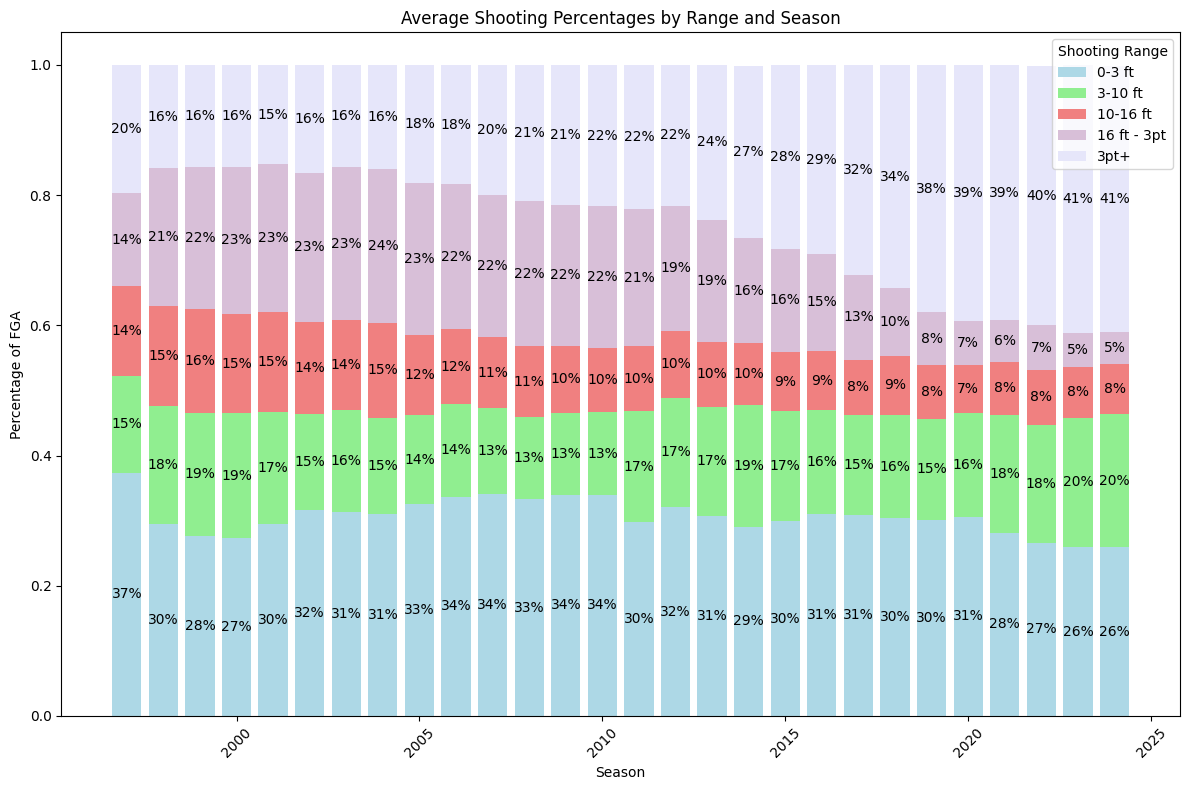

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_cleaned' is your DataFrame
data_cleaned['season'] = data_cleaned['season'].astype(int)

# Aggregating the average of percentage of FGA from different ranges per season
stacked_data = data_cleaned.groupby('season').agg({
    'percent_fga_from_x0_3_range': 'mean',
    'percent_fga_from_x3_10_range': 'mean',
    'percent_fga_from_x10_16_range': 'mean',
    'percent_fga_from_x16_3p_range': 'mean',
    'percent_fga_from_x3p_range': 'mean'
}).reset_index()

# Plotting stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width
bar_width = 0.8

# Plot stacked bar with specific colors for each range
ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x0_3_range'],
       label='0-3 ft', width=bar_width, color='lightblue')
for i, v in enumerate(stacked_data['percent_fga_from_x0_3_range']):
    ax.text(stacked_data['season'][i], v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x3_10_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'], label='3-10 ft', width=bar_width, color='lightgreen')
for i, v in enumerate(stacked_data['percent_fga_from_x3_10_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x10_16_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'],
       label='10-16 ft', width=bar_width, color='lightcoral')
for i, v in enumerate(stacked_data['percent_fga_from_x10_16_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x16_3p_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'] + stacked_data['percent_fga_from_x10_16_range'],
       label='16 ft - 3pt', width=bar_width, color='thistle')
for i, v in enumerate(stacked_data['percent_fga_from_x16_3p_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + stacked_data['percent_fga_from_x10_16_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(stacked_data['season'], stacked_data['percent_fga_from_x3p_range'],
       bottom=stacked_data['percent_fga_from_x0_3_range'] + stacked_data['percent_fga_from_x3_10_range'] + stacked_data['percent_fga_from_x10_16_range'] + stacked_data['percent_fga_from_x16_3p_range'],
       label='3pt+', width=bar_width, color='lavender')
for i, v in enumerate(stacked_data['percent_fga_from_x3p_range']):
    ax.text(stacked_data['season'][i], stacked_data['percent_fga_from_x0_3_range'][i] + stacked_data['percent_fga_from_x3_10_range'][i] + stacked_data['percent_fga_from_x10_16_range'][i] + stacked_data['percent_fga_from_x16_3p_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')


# Customizing chart
ax.set_title('Average Shooting Percentages by Range and Season')
ax.set_xlabel('Season')
ax.set_ylabel('Percentage of FGA')

# Display the legend
ax.legend(title="Shooting Range")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


สถิติการ ชู๊ตในระยะต่าง โดยจะแบ่งทั้งหมด 5 ระยะ วัดจากห่วง
1. 0 - 3 feet
2. 3 - 10 feet
3. 10 - 16 feet
4. 16 - 3pt (23 .5 feet)
5. > 3pt

จะเห็นได้ว่าสัดส่วนการ ชู๊ต 3 คะแนน มีสัดส่วนที่เพิ่มขึ้นอย่างชัดเจน คือถ้าวันจากปี 1997 ที่ 20% ในยุคปัจจุบัน ข้อมูลปี 2023 สัดส่วนการชู๊ต 3 คะแนนโดยเฉลี่ย เพิ่มขึ้นเป็น 41% เลยทีเดียว ในขณะที่ การให้ความสำคัญของการชู๊ตในระยะ 10-16 feet และ 16-3pt ก็ลดลงไปอย่างชัดเจน

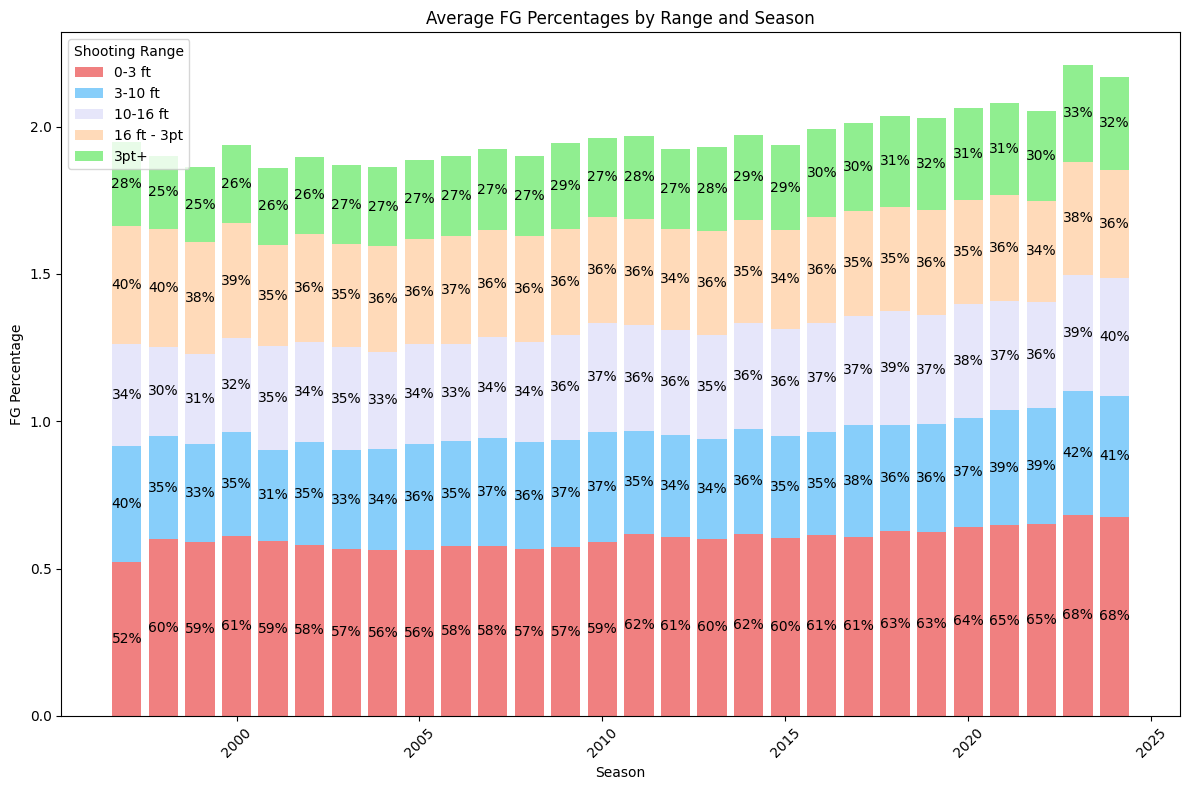

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV (ข้อมูลจริงจากไฟล์)
shooting_data = pd.read_csv('Player Shooting.csv')

# กรองข้อมูลตามฤดูกาลและคำนวณค่าเฉลี่ยสำหรับแต่ละระยะการยิง (0-3 ฟุต, 3-10 ฟุต, 10-16 ฟุต, 16 ฟุต-3pt, มากกว่า 3pt)
fg_percent_data = shooting_data.groupby('season').agg({
    'fg_percent_from_x0_3_range': 'mean',
    'fg_percent_from_x3_10_range': 'mean',
    'fg_percent_from_x10_16_range': 'mean',
    'fg_percent_from_x16_3p_range': 'mean',
    'fg_percent_from_x3p_range': 'mean'
}).reset_index()

# Define the colors to use from the provided color palette
colors = ['lightcoral', 'lightskyblue', 'lavender', 'peachpuff', 'lightgreen']

# ตั้งค่า bar_width สำหรับความกว้างของกราฟแท่ง
bar_width = 0.8

# Plotting stacked bar chart for FG percentages with the specified colors
fig, ax = plt.subplots(figsize=(12, 8))

# Plot stacked bar for FG percentages using specified colors
ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x0_3_range'],
       label='0-3 ft', width=bar_width, color=colors[0])
for i, v in enumerate(fg_percent_data['fg_percent_from_x0_3_range']):
    ax.text(fg_percent_data['season'][i], v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x3_10_range'],
       bottom=fg_percent_data['fg_percent_from_x0_3_range'], label='3-10 ft', width=bar_width, color=colors[1])
for i, v in enumerate(fg_percent_data['fg_percent_from_x3_10_range']):
    ax.text(fg_percent_data['season'][i], fg_percent_data['fg_percent_from_x0_3_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x10_16_range'],
       bottom=fg_percent_data['fg_percent_from_x0_3_range'] + fg_percent_data['fg_percent_from_x3_10_range'],
       label='10-16 ft', width=bar_width, color=colors[2])
for i, v in enumerate(fg_percent_data['fg_percent_from_x10_16_range']):
    ax.text(fg_percent_data['season'][i], fg_percent_data['fg_percent_from_x0_3_range'][i] + fg_percent_data['fg_percent_from_x3_10_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x16_3p_range'],
       bottom=fg_percent_data['fg_percent_from_x0_3_range'] + fg_percent_data['fg_percent_from_x3_10_range'] + fg_percent_data['fg_percent_from_x10_16_range'],
       label='16 ft - 3pt', width=bar_width, color=colors[3])
for i, v in enumerate(fg_percent_data['fg_percent_from_x16_3p_range']):
    ax.text(fg_percent_data['season'][i], fg_percent_data['fg_percent_from_x0_3_range'][i] + fg_percent_data['fg_percent_from_x3_10_range'][i] + fg_percent_data['fg_percent_from_x10_16_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

ax.bar(fg_percent_data['season'], fg_percent_data['fg_percent_from_x3p_range'],
       bottom=fg_percent_data['fg_percent_from_x0_3_range'] + fg_percent_data['fg_percent_from_x3_10_range'] + fg_percent_data['fg_percent_from_x10_16_range'] + fg_percent_data['fg_percent_from_x16_3p_range'],
       label='3pt+', width=bar_width, color=colors[4])
for i, v in enumerate(fg_percent_data['fg_percent_from_x3p_range']):
    ax.text(fg_percent_data['season'][i], fg_percent_data['fg_percent_from_x0_3_range'][i] + fg_percent_data['fg_percent_from_x3_10_range'][i] + fg_percent_data['fg_percent_from_x10_16_range'][i] + fg_percent_data['fg_percent_from_x16_3p_range'][i] + v / 2, f'{v:.0%}', ha='center', va='center')

# Customizing chart for FG percentages
ax.set_title('Average FG Percentages by Range and Season')
ax.set_xlabel('Season')
ax.set_ylabel('FG Percentage')
ax.legend(title="Shooting Range")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


ไม่ใช่แค่ค่า สัดส่วนในการชู๊ต 3pt คะแนนที่เพิ่มขึ้นแต่ ประสิทธิภาพ ในการชู๊ตนั้นก็มีแนวโน้มที่ดีขึ้นด้วย จะเห็นได้จาก ความแย่มยำในการชู๊ตที่มี % สูงขึ้น

ทั้งนี้ตัวรูปแบบการเล่นที่เปลี่ยนไป การมาของ Stephen Curry เป็นจุดเปลี่ยนของวงการให้ ทีมใน NBA หัดมาให้ความสำคัญกับ เรื่องสถิติและความน่าจะเป็นมากขึ้น นั้นคือถ้าเราลองคำนวน ค่าคาดหวังในการทำคะแนนโดยเฉลี่ยแล้ว ก็จะเห็นว่า ค่าคาดหวังของการทำคะแนนที่ระยะ 0-3 feet นั้นมีมากที่สุดเพราะเป็นระยะที่มีความแย่นยำสูงสุด แต่อัดนั้บที่ 2 กลับเป้นการทำคะแนนที่ระยะ 3 คะแนน เพราะโดยเฉลี่ยแล้ว การทำคะแนนที่ ตั้งแต่ละระ 10 feet ขึ้นไปนั้นแทบไม่ต่างกับ การชู๊ต 3 คะแนน เลยทำให้ทุกทีมใน NBA หันมาให้ความสำคัญในการทำคะแนน โดยเน้นไปที่ ระยะ 0-3 feet และ 3pt ไปเลยเพราะมีประสิทธิภาพมากกว่านั้นเอง

<ipython-input-156-44d8b3d3f089>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['x3p_percent'] = (filtered_data['x3p'] / filtered_data['x3pa']) * 100


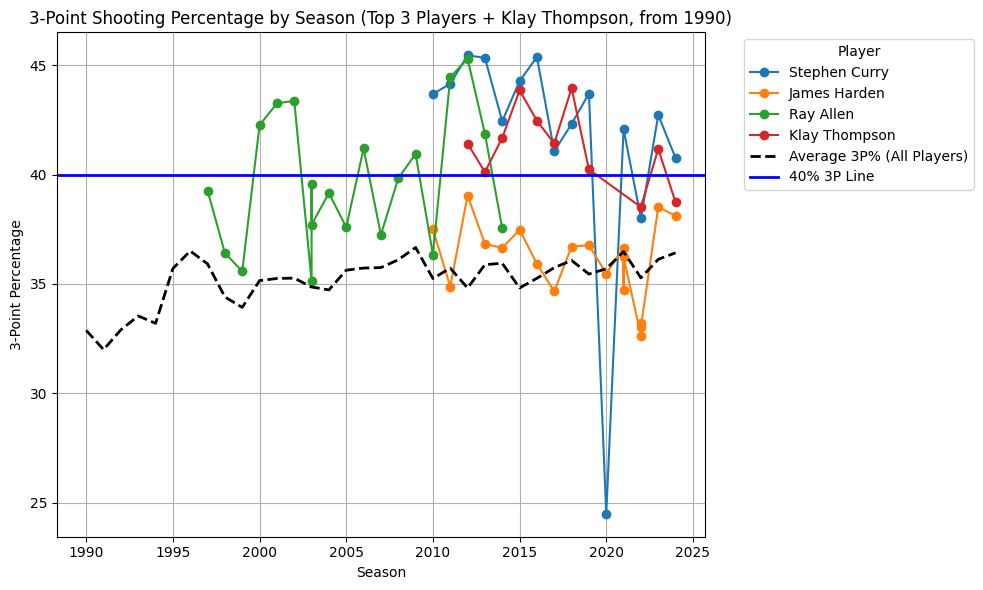

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV
shooting_data = pd.read_csv('Player Shooting.csv')
totals_data = pd.read_csv('Player Totals.csv')

# สร้างคอลัมน์ใหม่ 'Player-Season' โดยรวมชื่อผู้เล่นกับฤดูกาล
totals_data['Player-Season'] = totals_data['player'] + '-' + totals_data['season'].astype(str)

# รวมจำนวนครั้งที่ทำ 3-Point สำเร็จของผู้เล่นทั้งหมด
player_3p_totals = totals_data.groupby('player')['x3p'].sum()

# รวมจำนวนครั้งที่ยิง 3-Point ทั้งหมดของผู้เล่นแต่ละคน
player_3pa_totals = totals_data.groupby('player')['x3pa'].sum()

# คำนวณเปอร์เซ็นต์การยิง 3-Point (x3p_percent = x3p / x3pa * 100)
player_x3p_percent = (player_3p_totals / player_3pa_totals) * 100

# รวมจำนวน 3-Point ที่ทำสำเร็จและเปอร์เซ็นต์การยิงลงใน DataFrame
top_10_by_total_x3p_with_percent = pd.DataFrame({
    'player': player_3p_totals.index,
    'x3p': player_3p_totals.values,
    'x3p_percent': player_x3p_percent.values
}).sort_values(by='x3p', ascending=False).head(10)

# Filter the data to include only seasons starting from 1990
filtered_data = totals_data[totals_data['season'] >= 1990]

# Calculate 3-point percentage for each player in each season
filtered_data['x3p_percent'] = (filtered_data['x3p'] / filtered_data['x3pa']) * 100

# Calculate the average 3-point percentage for all players across all seasons starting from 1990
average_x3p_percent_per_season_from_1990 = totals_data[totals_data['season'] >= 1990].groupby('season').apply(
    lambda x: (x['x3p'].sum() / x['x3pa'].sum()) * 100 if x['x3pa'].sum() != 0 else 0
)

# Filter the top 3 players plus Klay Thompson
top_players = top_10_by_total_x3p_with_percent['player'].head(3).tolist() + ['Klay Thompson']

# Filter the data to include only the selected players
filtered_data_selected_players = filtered_data[filtered_data['player'].isin(top_players)]

# Plot with markers for the selected players (top 3 + Klay Thompson)
plt.figure(figsize=(10, 6))

for player in top_players:
    player_data = filtered_data_selected_players[filtered_data_selected_players['player'] == player]
    plt.plot(player_data['season'], player_data['x3p_percent'], marker='o', label=player)

# Plot the average 3-point shooting percentage across all players per season (from 1990)
plt.plot(average_x3p_percent_per_season_from_1990.index, average_x3p_percent_per_season_from_1990,
         linestyle='--', color='black', label='Average 3P% (All Players)', linewidth=2)

# เพิ่มเส้นสีเขียวที่ค่า 40% สำหรับ 3-Point Shooting Percentage
plt.axhline(y=40, color='blue', linestyle='-', linewidth=2, label='40% 3P Line')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('3-Point Percentage')
plt.title('3-Point Shooting Percentage by Season (Top 3 Players + Klay Thompson, from 1990)')
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to fit the legend better
plt.tight_layout()

# Show the plot
plt.show()



ผู้เล่นที่ ทำคะแนน 3 คะแนนจึงโดนเด่นขึ้นมาใน NBA และ ทีม Golden State Warriors ทีมี คู่หู (Splash Brothers) Stephen Curry และ Klay Thompson ที่ช่วงที่พวกเค้าเล่นดี พวกเค้ามี %ความแย่นยำในการชู๊ต 3 คะแนน เกิน 40%

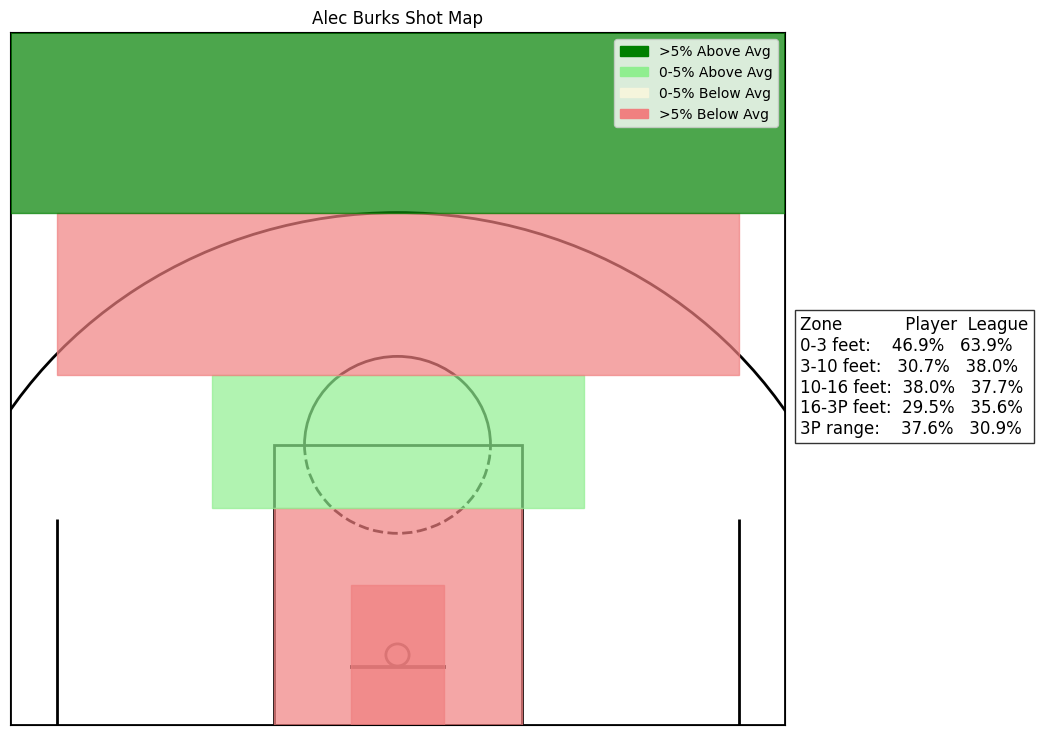

In [ ]:
# นำเข้าห้องสมุดที่จำเป็น
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import numpy as np
import pandas as pd

# ฟังก์ชันวาดสนามบาสเกตบอล
def draw_basketball_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # สร้างเส้นรอบสนาม (ครึ่งสนาม)
    outer_box = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
    free_throw_top = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
    free_throw_bottom = Arc((0, 142.5), 120, 120, theta1=180, theta2=360, linewidth=lw, color=color, linestyle='dashed')

    # พื้นที่ Key (พื้นที่สี)
    inner_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # เส้นสำหรับ 16-3P feet
    three_point_arc = Arc((0, 0), 600, 600, theta1=22, theta2=158, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)

    # ห่วงบาส
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # กระดานหลังห่วง
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # เพิ่มองค์ประกอบของสนามเข้าไปในกราฟ
    court_elements = [outer_box, free_throw_top, free_throw_bottom, inner_box,
                      three_point_arc, corner_three_a, corner_three_b, hoop, backboard]

    for element in court_elements:
        ax.add_patch(element)

    return ax

# ฟังก์ชันวาดแผนที่ยิงโดยใช้ข้อมูลเปอร์เซ็นต์การยิงในแต่ละโซน
def draw_shot_map(ax=None, player_name=None, shooting_zones=None, shooting_categories=None, player_data=None, league_averages=None):
    if ax is None:
        ax = plt.gca()

    # วาดสนามบาสเกตบอล
    draw_basketball_court(ax)

    # กำหนดพิกัดของแต่ละโซนยิงบนสนาม
    zone_coords = {
        '0-3 feet': (-30, 30, -47.5, 47.5),  # ใกล้ห่วง (พื้นที่สี)
        '3-10 feet': (-80, 80, -47.5, 100),  # ใกล้ห่วง
        '10-16 feet': (-120, 120, 100, 190),  # ระยะกลาง
        '16-3P feet': (-220, 220, 190, 300),  # ระยะกลาง-ไกล
        '3P': (-250, 250, 300, 422.5)  # ระยะสามแต้ม
    }

    # สร้างโซนยิงสำหรับแต่ละพื้นที่และระบายสีตามเปอร์เซ็นต์การยิง
    color_map = {
        'green': 'green',
        'light_green': 'lightgreen',
        'cream': 'beige',
        'light_red': 'lightcoral'
    }

    for zone, (x_min, x_max, y_min, y_max) in zone_coords.items():
        category = shooting_categories[zone]
        color = color_map[category]

        # สร้างรูปสี่เหลี่ยมสำหรับแต่ละโซน
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, color=color, alpha=0.7)
        ax.add_patch(rect)

    # เพิ่มชื่อของกราฟ
    ax.set_title(f'{player_name} Shot Map')

    # แสดงค่าของเปอร์เซ็นต์การยิงของผู้เล่นและค่าเฉลี่ยของลีกในกรอบด้านข้าง
    summary_text = (
        f"Zone            Player  League\n"
        f"0-3 feet:    {player_data['fg_percent_from_x0_3_range']*100:.1f}%   {league_averages['fg_percent_from_x0_3_range']*100:.1f}%\n"
        f"3-10 feet:   {player_data['fg_percent_from_x3_10_range']*100:.1f}%   {league_averages['fg_percent_from_x3_10_range']*100:.1f}%\n"
        f"10-16 feet:  {player_data['fg_percent_from_x10_16_range']*100:.1f}%   {league_averages['fg_percent_from_x10_16_range']*100:.1f}%\n"
        f"16-3P feet:  {player_data['fg_percent_from_x16_3p_range']*100:.1f}%   {league_averages['fg_percent_from_x16_3p_range']*100:.1f}%\n"
        f"3P range:    {player_data['fg_percent_from_x3p_range']*100:.1f}%   {league_averages['fg_percent_from_x3p_range']*100:.1f}%"
    )
    plt.text(260, 150, summary_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # เพิ่มคำอธิบายความหมายของสี
    legend_elements = [
        Rectangle((0, 0), 1, 1, color=color_map['green'], label='>5% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_green'], label='0-5% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['cream'], label='0-5% Below Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_red'], label='>5% Below Avg')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    return ax

# โหลดข้อมูลจากไฟล์ CSV ที่ผู้ใช้ได้อัปโหลด
file_path = 'Player Shooting.csv'
shooting_data = pd.read_csv(file_path)

# กรองข้อมูลสำหรับ 10 ฤดูกาลล่าสุด (2015-2024)
last_10_seasons = shooting_data[shooting_data['season'] >= 2015]

# คำนวณค่าเฉลี่ยของลีกสำหรับโซนการยิงในช่วง 10 ปีล่าสุด
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]
league_averages_last_10_years = last_10_seasons[shooting_zones_columns].mean()

# ฟังก์ชันสำหรับกำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงตามความแตกต่างจากค่าเฉลี่ยของลีก
def categorize_shooting_percentage(player_percent, league_avg):
    diff = player_percent - league_avg
    if diff > 0.05:
        return 'green'
    elif 0 < diff <= 0.05:
        return 'light_green'
    elif -0.05 <= diff < 0:
        return 'cream'
    else:
        return 'light_red'

# กำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงสำหรับแต่ละโซนการยิง
for zone in shooting_zones_columns:
    league_avg = league_averages_last_10_years[zone]
    shooting_data[f'{zone}_category'] = shooting_data[zone].apply(lambda x: categorize_shooting_percentage(x, league_avg))

# สร้างแผนที่การยิงสำหรับผู้เล่นที่ระบุ
player_name = 'Alec Burks'  # เปลี่ยนชื่อผู้เล่นตามที่ต้องการ
player_data = shooting_data[shooting_data['player'] == player_name].iloc[0]

# แปลงข้อมูลเปอร์เซ็นต์การยิงเป็นหมวดหมู่
shooting_categories = {
    '0-3 feet': player_data['fg_percent_from_x0_3_range_category'],
    '3-10 feet': player_data['fg_percent_from_x3_10_range_category'],
    '10-16 feet': player_data['fg_percent_from_x10_16_range_category'],
    '16-3P feet': player_data['fg_percent_from_x16_3p_range_category'],
    '3P': player_data['fg_percent_from_x3p_range_category']
}

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(10, 9))

# วาดแผนที่ยิงของผู้เล่นที่เลือก
draw_shot_map(ax=ax, player_name=player_name, shooting_zones=None, shooting_categories=shooting_categories, player_data=player_data, league_averages=league_averages_last_10_years)

# กำหนดขอบเขตของกราฟ
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)

# ซ่อนแกน
ax.set_xticks([])
ax.set_yticks([])

# แสดงกราฟ
plt.show()



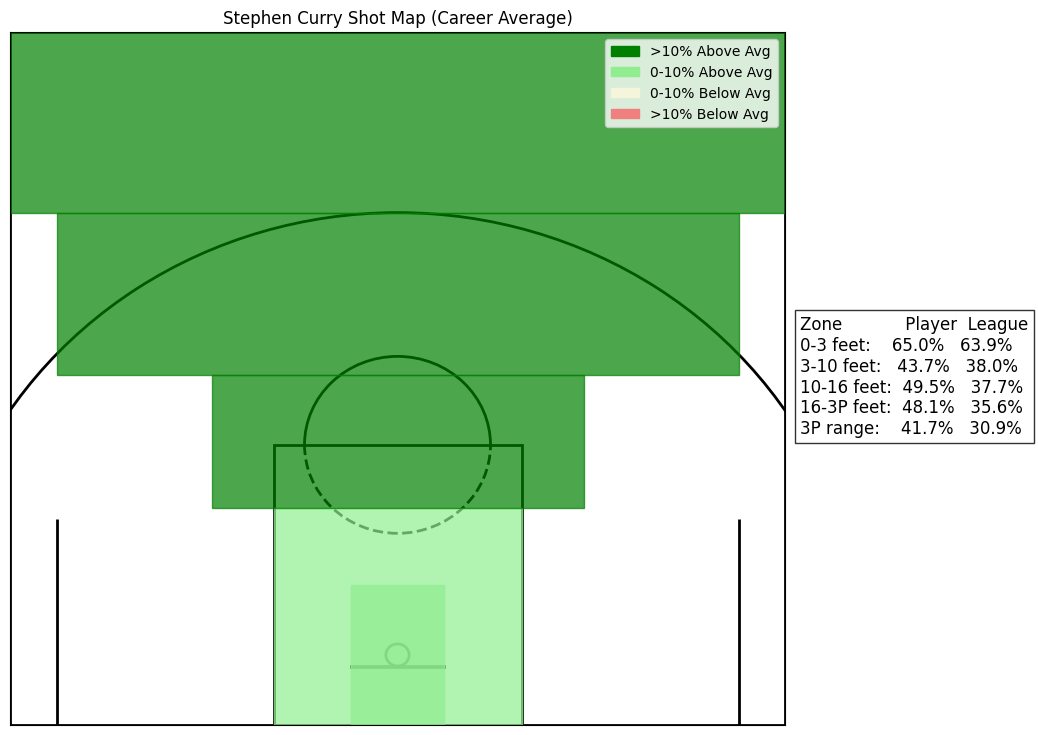

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import numpy as np
import pandas as pd

# ฟังก์ชันวาดสนามบาสเกตบอล
def draw_basketball_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # สร้างเส้นรอบสนาม (ครึ่งสนาม)
    outer_box = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
    free_throw_top = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
    free_throw_bottom = Arc((0, 142.5), 120, 120, theta1=180, theta2=360, linewidth=lw, color=color, linestyle='dashed')

    # พื้นที่ Key (พื้นที่สี)
    inner_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # เส้นสำหรับ 16-3P feet
    three_point_arc = Arc((0, 0), 600, 600, theta1=22, theta2=158, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)

    # ห่วงบาส
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # กระดานหลังห่วง
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # เพิ่มองค์ประกอบของสนามเข้าไปในกราฟ
    court_elements = [outer_box, free_throw_top, free_throw_bottom, inner_box,
                      three_point_arc, corner_three_a, corner_three_b, hoop, backboard]

    for element in court_elements:
        ax.add_patch(element)

    return ax

# กำหนดพิกัดของแต่ละโซนยิงบนสนาม (ย้ายออกมานอก draw_shot_map)
zone_coords = {
    '0-3 feet': (-30, 30, -47.5, 47.5),  # ใกล้ห่วง (พื้นที่สี)
    '3-10 feet': (-80, 80, -47.5, 100),  # ใกล้ห่วง
    '10-16 feet': (-120, 120, 100, 190),  # ระยะกลาง
    '16-3P feet': (-220, 220, 190, 300),  # ระยะกลาง-ไกล
    '3P': (-250, 250, 300, 422.5)  # ระยะสามแต้ม
}

# ฟังก์ชันวาดแผนที่ยิงโดยใช้ข้อมูลเปอร์เซ็นต์การยิงในแต่ละโซน
def draw_shot_map(ax=None, player_name=None, shooting_zones=None, shooting_categories=None, player_data=None, league_averages=None):
    if ax is None:
        ax = plt.gca()

    # วาดสนามบาสเกตบอล
    draw_basketball_court(ax)

    # สร้างโซนยิงสำหรับแต่ละพื้นที่และระบายสีตามเปอร์เซ็นต์การยิง
    color_map = {
        'green': 'green',
        'light_green': 'lightgreen',
        'cream': 'beige',
        'light_red': 'lightcoral'
    }

    for zone, (x_min, x_max, y_min, y_max) in zone_coords.items():
        category = shooting_categories[zone]
        color = color_map[category]

        # สร้างรูปสี่เหลี่ยมสำหรับแต่ละโซน
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, color=color, alpha=0.7)
        ax.add_patch(rect)

    # เพิ่มชื่อของกราฟ
    ax.set_title(f'{player_name} Shot Map (Career Average)')

    # แสดงค่าของเปอร์เซ็นต์การยิงของผู้เล่นและค่าเฉลี่ยของลีกในกรอบด้านข้าง
    summary_text = (
        f"Zone            Player  League\n"
        f"0-3 feet:    {player_data['fg_percent_from_x0_3_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x0_3_range']*100:.1f}%\n"
        f"3-10 feet:   {player_data['fg_percent_from_x3_10_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x3_10_range']*100:.1f}%\n"
        f"10-16 feet:  {player_data['fg_percent_from_x10_16_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x10_16_range']*100:.1f}%\n"
        f"16-3P feet:  {player_data['fg_percent_from_x16_3p_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x16_3p_range']*100:.1f}%\n"
        f"3P range:    {player_data['fg_percent_from_x3p_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x3p_range']*100:.1f}%"
    )
    plt.text(260, 150, summary_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # เพิ่มคำอธิบายความหมายของสี
    legend_elements = [
        Rectangle((0, 0), 1, 1, color=color_map['green'], label='>10% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_green'], label='0-10% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['cream'], label='0-10% Below Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_red'], label='>10% Below Avg')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    return ax

# โหลดข้อมูลจากไฟล์ CSV ที่ผู้ใช้ได้อัปโหลด
file_path = 'Player Shooting.csv'  # เปลี่ยนเป็นชื่อไฟล์ของคุณ
shooting_data = pd.read_csv(file_path)

# แปลงคอลัมน์ 'season' เป็นจำนวนเต็ม
shooting_data['season'] = shooting_data['season'].astype(int)

# กรองข้อมูลสำหรับ 10 ฤดูกาลล่าสุด (2015-2024)
last_10_seasons = shooting_data[shooting_data['season'] >= 2015]

# เลือกเฉพาะคอลัมน์เปอร์เซ็นต์การยิง
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]
shooting_data = shooting_data[['player', 'season'] + shooting_zones_columns]  # เลือกคอลัมน์ที่ต้องการ

# คำนวณค่าเฉลี่ยของลีกสำหรับโซนการยิงในช่วง 10 ปีล่าสุด
league_averages_last_10_years = last_10_seasons[shooting_zones_columns].mean()

# ฟังก์ชันสำหรับกำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงตามความแตกต่างจากค่าเฉลี่ยของลีก
def categorize_shooting_percentage(player_percent, league_avg):
    diff = player_percent - league_avg
    if diff > 0.10:
        return 'green'
    elif 0 < diff <= 0.10:
        return 'light_green'
    elif -0.10 <= diff < 0:
        return 'cream'
    else:
        return 'light_red'

# สร้างแผนที่การยิงสำหรับผู้เล่นที่ระบุ
player_name = "Stephen Curry"  # เปลี่ยนชื่อผู้เล่นตามที่ต้องการ

# คำนวณค่าเฉลี่ยของผู้เล่นทุกปี
player_data = shooting_data[shooting_data['player'] == player_name].groupby('player').mean()

# กำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงสำหรับแต่ละโซนการยิง
shooting_categories = {}

# Map ชื่อโซนกับชื่อคอลัมน์
zone_to_column = {
    '0-3 feet': 'fg_percent_from_x0_3_range',
    '3-10 feet': 'fg_percent_from_x3_10_range',
    '10-16 feet': 'fg_percent_from_x10_16_range',
    '16-3P feet': 'fg_percent_from_x16_3p_range',
    '3P': 'fg_percent_from_x3p_range'
}

for zone in zone_coords:  # ใช้ zone_coords เพราะเป็นชื่อโซน
    column_name = zone_to_column[zone]  # ดึงชื่อคอลัมน์ที่ตรงกับโซน
    league_avg = league_averages_last_10_years[column_name]
    player_percent = player_data[column_name].iloc[0]  # ดึงค่าเฉลี่ยของผู้เล่นในคอลัมน์นี้
    shooting_categories[zone] = categorize_shooting_percentage(player_percent, league_avg)

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(10, 9))

# วาดแผนที่ยิงของผู้เล่นที่เลือก
draw_shot_map(ax=ax,
               player_name=player_name,
               shooting_zones=None,
               shooting_categories=shooting_categories,
               player_data=player_data,
               league_averages=league_averages_last_10_years)

# กำหนดขอบเขตของกราฟ
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)

# ซ่อนแกน
ax.set_xticks([])
ax.set_yticks([])

# แสดงกราฟ
plt.show()

Stephen Curry เค้ามีสถิติที่ดีทั้งในการชู๊ต ระยะกลาง และ 3 คะแนน

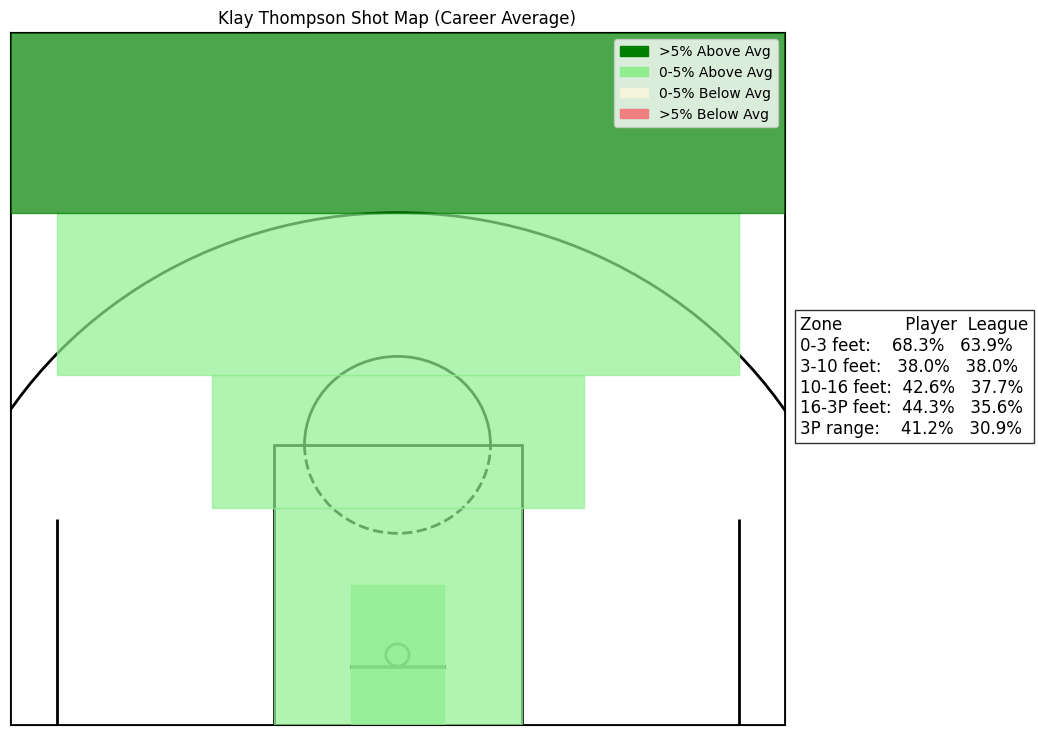

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import numpy as np
import pandas as pd

# ฟังก์ชันวาดสนามบาสเกตบอล
def draw_basketball_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # สร้างเส้นรอบสนาม (ครึ่งสนาม)
    outer_box = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
    free_throw_top = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
    free_throw_bottom = Arc((0, 142.5), 120, 120, theta1=180, theta2=360, linewidth=lw, color=color, linestyle='dashed')

    # พื้นที่ Key (พื้นที่สี)
    inner_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # เส้นสำหรับ 16-3P feet
    three_point_arc = Arc((0, 0), 600, 600, theta1=22, theta2=158, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)

    # ห่วงบาส
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # กระดานหลังห่วง
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # เพิ่มองค์ประกอบของสนามเข้าไปในกราฟ
    court_elements = [outer_box, free_throw_top, free_throw_bottom, inner_box,
                      three_point_arc, corner_three_a, corner_three_b, hoop, backboard]

    for element in court_elements:
        ax.add_patch(element)

    return ax

# กำหนดพิกัดของแต่ละโซนยิงบนสนาม (ย้ายออกมานอก draw_shot_map)
zone_coords = {
    '0-3 feet': (-30, 30, -47.5, 47.5),  # ใกล้ห่วง (พื้นที่สี)
    '3-10 feet': (-80, 80, -47.5, 100),  # ใกล้ห่วง
    '10-16 feet': (-120, 120, 100, 190),  # ระยะกลาง
    '16-3P feet': (-220, 220, 190, 300),  # ระยะกลาง-ไกล
    '3P': (-250, 250, 300, 422.5)  # ระยะสามแต้ม
}

# ฟังก์ชันวาดแผนที่ยิงโดยใช้ข้อมูลเปอร์เซ็นต์การยิงในแต่ละโซน
def draw_shot_map(ax=None, player_name=None, shooting_zones=None, shooting_categories=None, player_data=None, league_averages=None):
    if ax is None:
        ax = plt.gca()

    # วาดสนามบาสเกตบอล
    draw_basketball_court(ax)

    # สร้างโซนยิงสำหรับแต่ละพื้นที่และระบายสีตามเปอร์เซ็นต์การยิง
    color_map = {
        'green': 'green',
        'light_green': 'lightgreen',
        'cream': 'beige',
        'light_red': 'lightcoral'
    }

    for zone, (x_min, x_max, y_min, y_max) in zone_coords.items():
        category = shooting_categories[zone]
        color = color_map[category]

        # สร้างรูปสี่เหลี่ยมสำหรับแต่ละโซน
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, color=color, alpha=0.7)
        ax.add_patch(rect)

    # เพิ่มชื่อของกราฟ
    ax.set_title(f'{player_name} Shot Map (Career Average)')

    # แสดงค่าของเปอร์เซ็นต์การยิงของผู้เล่นและค่าเฉลี่ยของลีกในกรอบด้านข้าง
    summary_text = (
        f"Zone            Player  League\n"
        f"0-3 feet:    {player_data['fg_percent_from_x0_3_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x0_3_range']*100:.1f}%\n"
        f"3-10 feet:   {player_data['fg_percent_from_x3_10_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x3_10_range']*100:.1f}%\n"
        f"10-16 feet:  {player_data['fg_percent_from_x10_16_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x10_16_range']*100:.1f}%\n"
        f"16-3P feet:  {player_data['fg_percent_from_x16_3p_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x16_3p_range']*100:.1f}%\n"
        f"3P range:    {player_data['fg_percent_from_x3p_range'].iloc[0]*100:.1f}%   {league_averages['fg_percent_from_x3p_range']*100:.1f}%"
    )
    plt.text(260, 150, summary_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # เพิ่มคำอธิบายความหมายของสี
    legend_elements = [
        Rectangle((0, 0), 1, 1, color=color_map['green'], label='>5% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_green'], label='0-5% Above Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['cream'], label='0-5% Below Avg'),
        Rectangle((0, 0), 1, 1, color=color_map['light_red'], label='>5% Below Avg')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    return ax

# โหลดข้อมูลจากไฟล์ CSV ที่ผู้ใช้ได้อัปโหลด
file_path = 'Player Shooting.csv'  # เปลี่ยนเป็นชื่อไฟล์ของคุณ
shooting_data = pd.read_csv(file_path)

# แปลงคอลัมน์ 'season' เป็นจำนวนเต็ม
shooting_data['season'] = shooting_data['season'].astype(int)

# กรองข้อมูลสำหรับ 10 ฤดูกาลล่าสุด (2015-2024)
last_10_seasons = shooting_data[shooting_data['season'] >= 2015]

# เลือกเฉพาะคอลัมน์เปอร์เซ็นต์การยิง
shooting_zones_columns = [
    'fg_percent_from_x0_3_range',
    'fg_percent_from_x3_10_range',
    'fg_percent_from_x10_16_range',
    'fg_percent_from_x16_3p_range',
    'fg_percent_from_x3p_range'
]
shooting_data = shooting_data[['player', 'season'] + shooting_zones_columns]  # เลือกคอลัมน์ที่ต้องการ

# คำนวณค่าเฉลี่ยของลีกสำหรับโซนการยิงในช่วง 10 ปีล่าสุด
league_averages_last_10_years = last_10_seasons[shooting_zones_columns].mean()

# ฟังก์ชันสำหรับกำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงตามความแตกต่างจากค่าเฉลี่ยของลีก
def categorize_shooting_percentage(player_percent, league_avg):
    diff = player_percent - league_avg
    if diff > 0.10:
        return 'green'
    elif 0 < diff <= 0.10:
        return 'light_green'
    elif -0.10 <= diff < 0:
        return 'cream'
    else:
        return 'light_red'

# สร้างแผนที่การยิงสำหรับผู้เล่นที่ระบุ
player_name = 'Klay Thompson'  # เปลี่ยนชื่อผู้เล่นตามที่ต้องการ

# คำนวณค่าเฉลี่ยของผู้เล่นทุกปี
player_data = shooting_data[shooting_data['player'] == player_name].groupby('player').mean()

# กำหนดหมวดหมู่ของเปอร์เซ็นต์การยิงสำหรับแต่ละโซนการยิง
shooting_categories = {}

# Map ชื่อโซนกับชื่อคอลัมน์
zone_to_column = {
    '0-3 feet': 'fg_percent_from_x0_3_range',
    '3-10 feet': 'fg_percent_from_x3_10_range',
    '10-16 feet': 'fg_percent_from_x10_16_range',
    '16-3P feet': 'fg_percent_from_x16_3p_range',
    '3P': 'fg_percent_from_x3p_range'
}

for zone in zone_coords:  # ใช้ zone_coords เพราะเป็นชื่อโซน
    column_name = zone_to_column[zone]  # ดึงชื่อคอลัมน์ที่ตรงกับโซน
    league_avg = league_averages_last_10_years[column_name]
    player_percent = player_data[column_name].iloc[0]  # ดึงค่าเฉลี่ยของผู้เล่นในคอลัมน์นี้
    shooting_categories[zone] = categorize_shooting_percentage(player_percent, league_avg)

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(10, 9))

# วาดแผนที่ยิงของผู้เล่นที่เลือก
draw_shot_map(ax=ax,
               player_name=player_name,
               shooting_zones=None,
               shooting_categories=shooting_categories,
               player_data=player_data,
               league_averages=league_averages_last_10_years)

# กำหนดขอบเขตของกราฟ
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)

# ซ่อนแกน
ax.set_xticks([])
ax.set_yticks([])

# แสดงกราฟ
plt.show()

Klay Thompson จะถนัดการชู๊ตที่ระยะ 3 คะแนน